In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'
%matplotlib widget
import numpy as np
import h5py

In [1]:
vert = []
for case in sorted(Path("data/").glob("rib*[1-3].hdf5")):
    with h5py.File(case, 'r') as f:
        Umx = np.asarray(f['Umx'])
        (I,J) = f.attrs['I'], f.attrs['J']
        y = np.asarray(f['y'])
        L = f.attrs['L']
        Q = f.attrs['Q']
    y_reshape = y.reshape((J,I))
    u_bar = np.nanmean(Umx,0).reshape((J,I))
    if L == 50:
        u_bar_utval = u_bar[:,38:107]
    elif L==75:
        u_bar_utval = u_bar[:,11:100]
    else:
        u_bar_utval = u_bar[:,40:100]
    vert.append(dict(Q=Q, L=L, u = np.nanmean(u_bar_utval,axis=1), y = y_reshape[:,0], filename = case.stem))

    

/tmp/ipykernel_2574052/1949370068.py:10: RuntimeWarning: Mean of empty slice
  u_bar = np.nanmean(Umx,0).reshape((J,I))
/tmp/ipykernel_2574052/1949370068.py:17: RuntimeWarning: Mean of empty slice
  vert.append(dict(Q=Q, L=L, u = np.nanmean(u_bar_utval,axis=1), y = y_reshape[:,0], filename = case.stem))


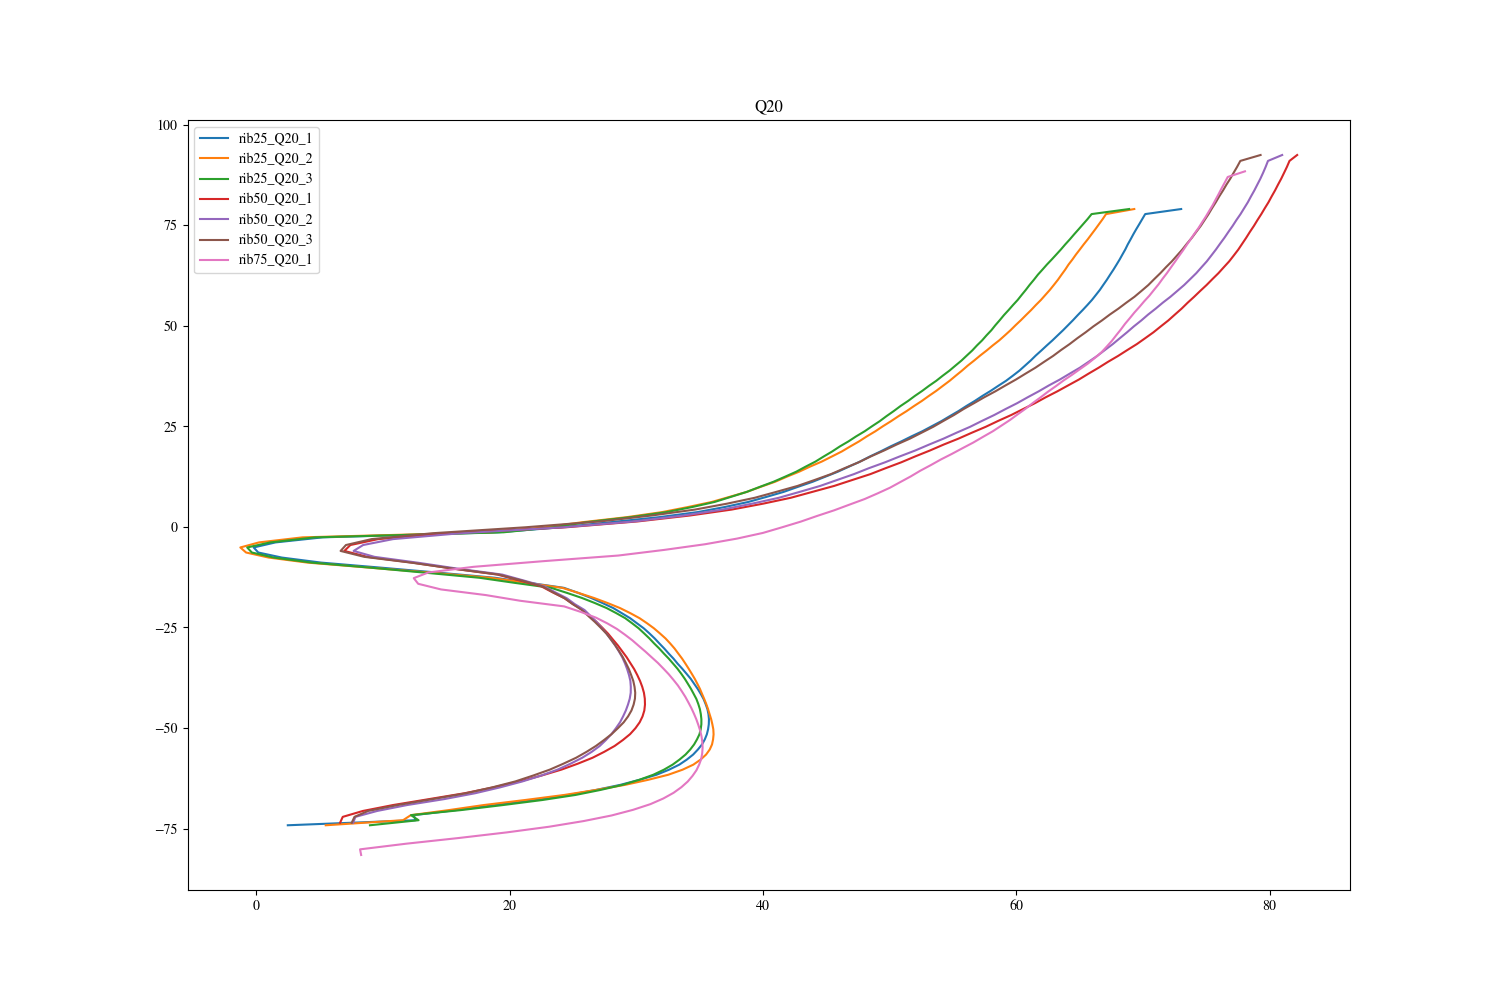

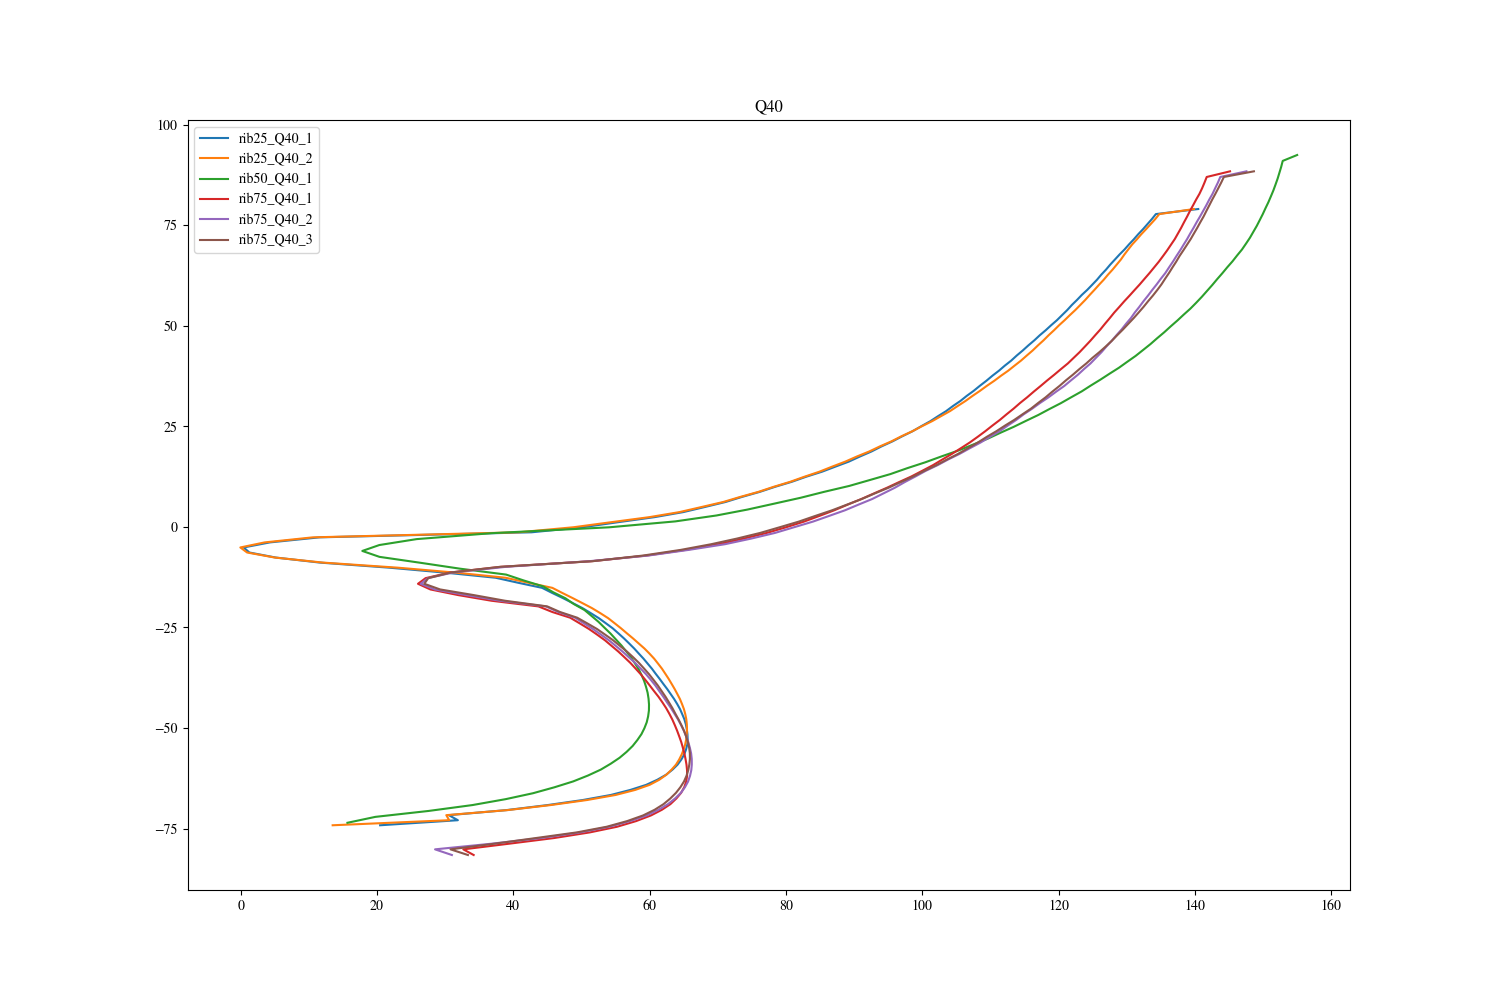

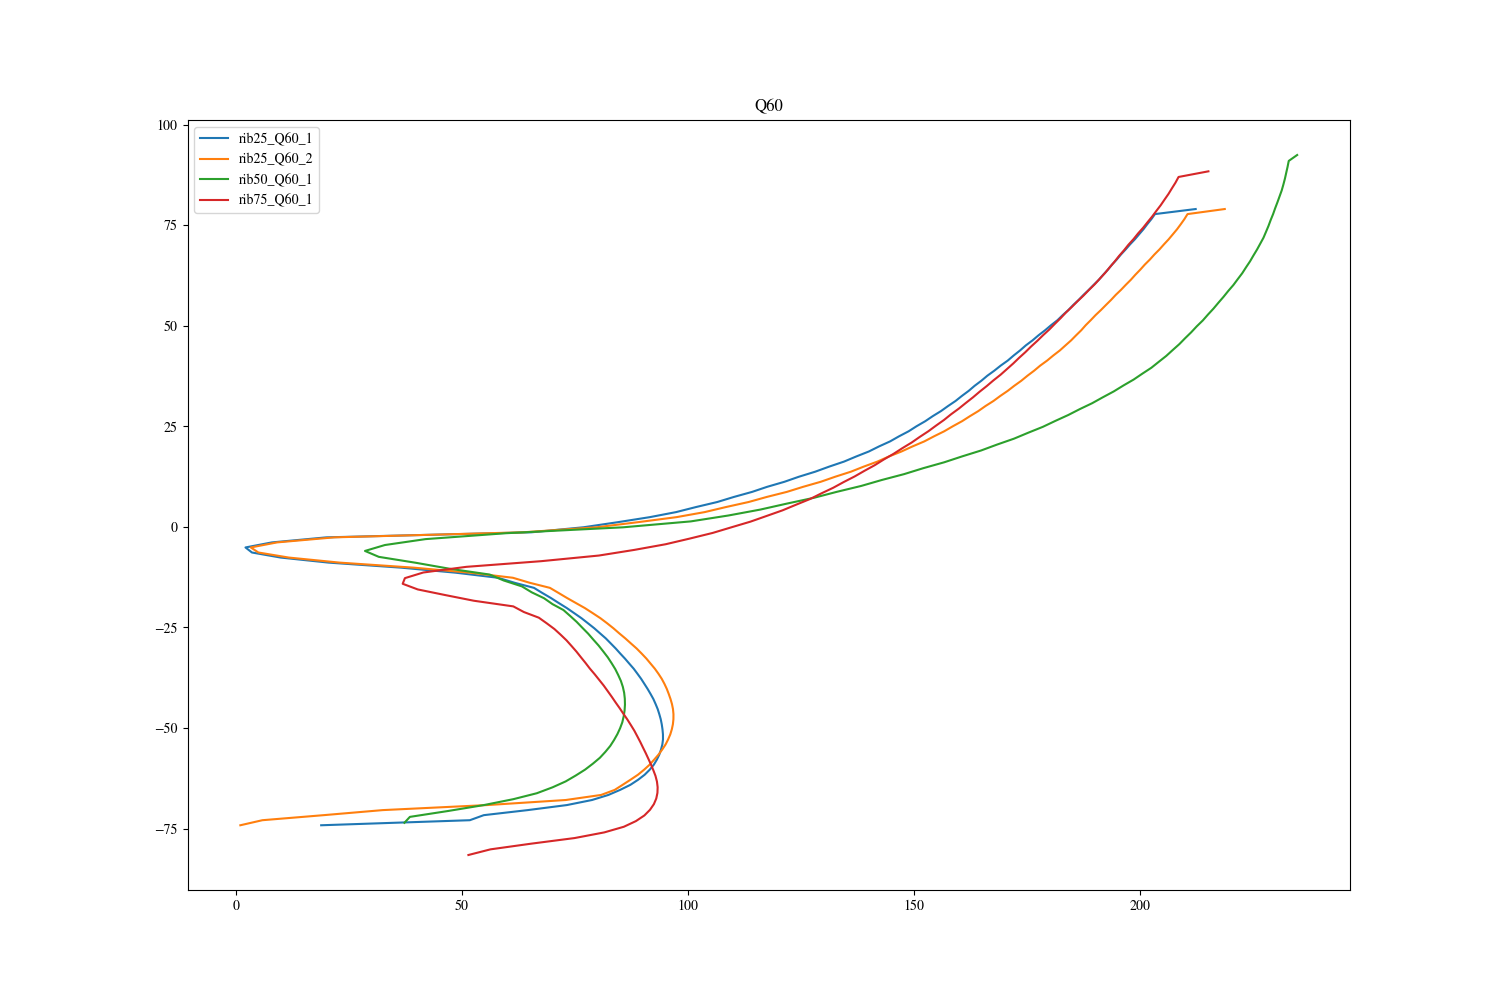

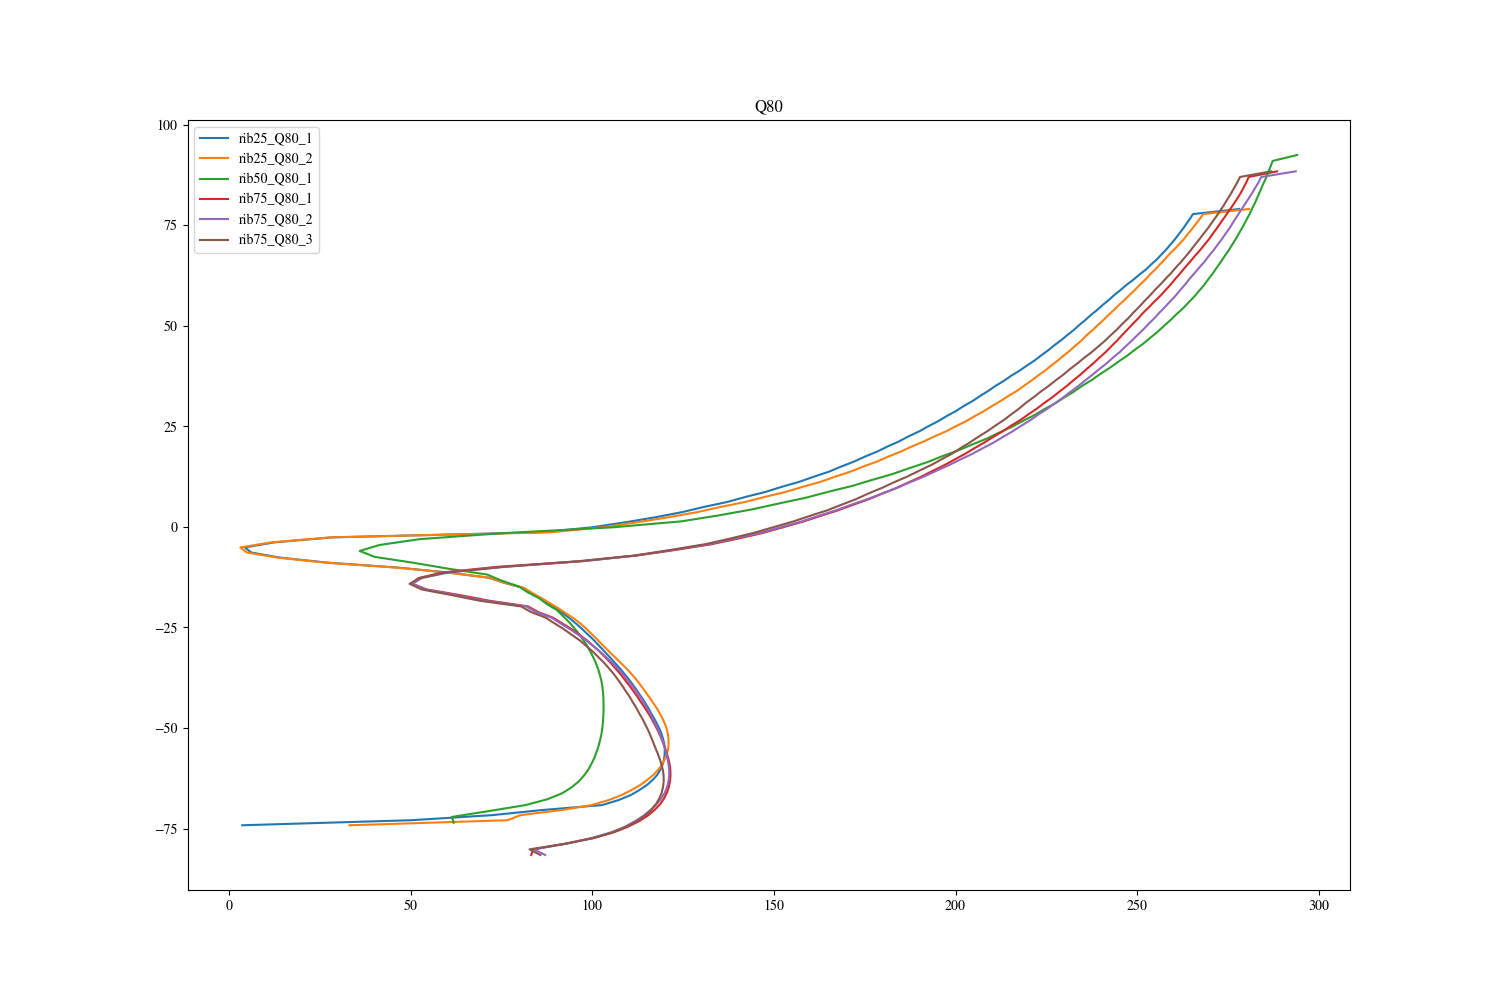

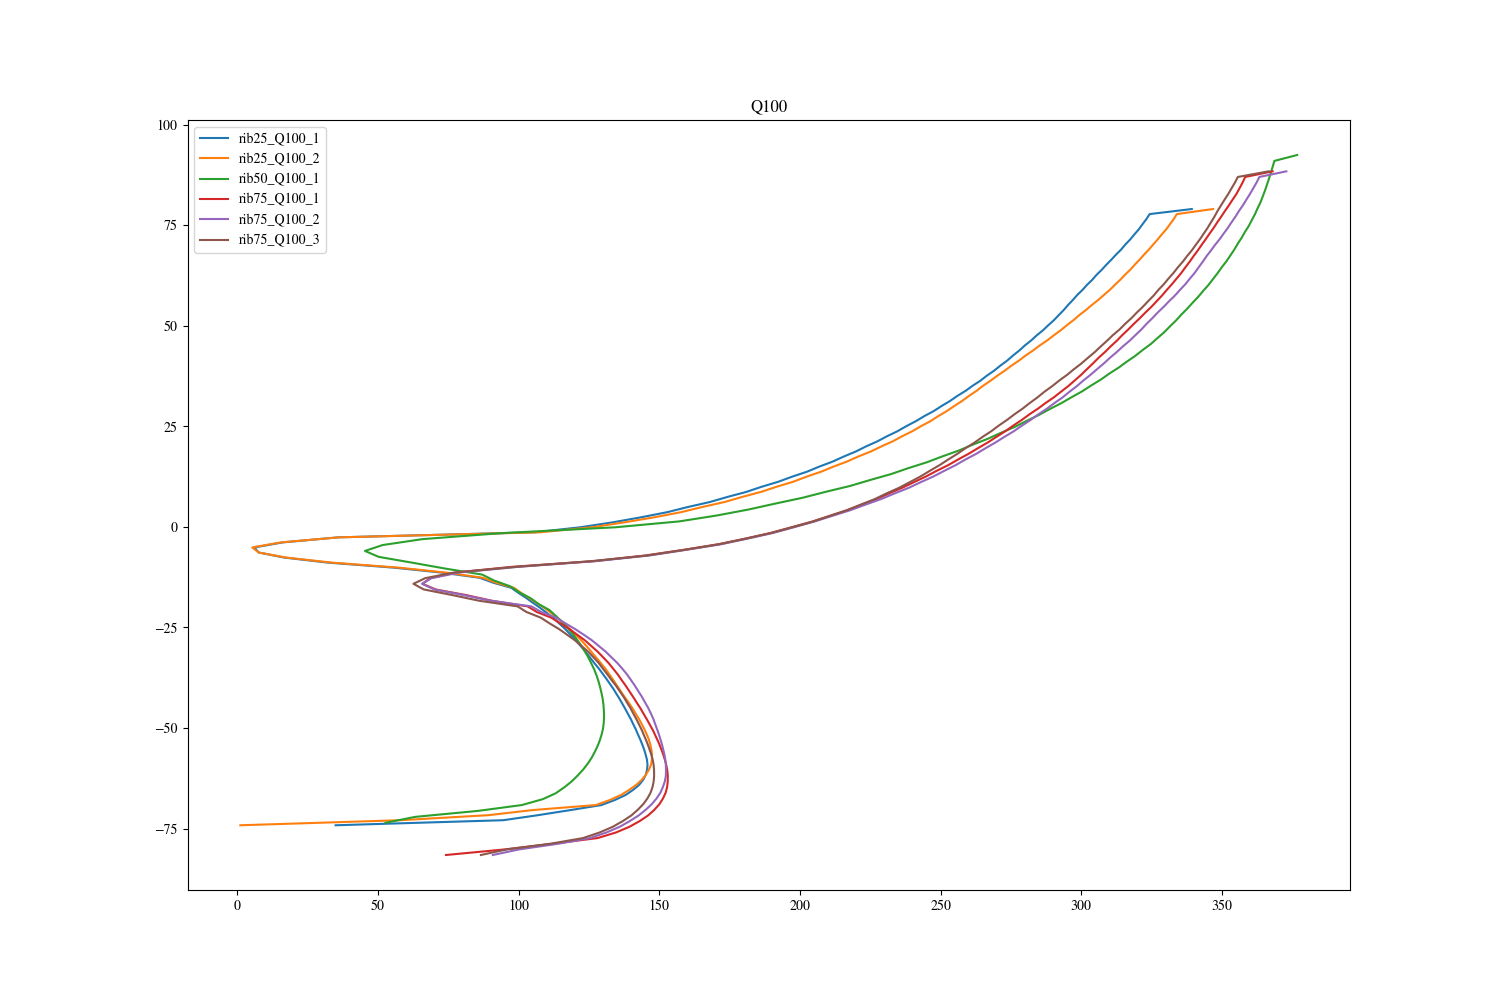

In [5]:
for flow in [20,40,60,80,100]:
    fig,ax = plt.subplots(figsize=(15,10))
    for f in vert: 
        if f['Q'] == flow:
            ax.plot(f['u'],f['y'],label=f['filename'])
            ax.set_title(f"Q{f['Q']}")
    ax.legend()